<a href="https://colab.research.google.com/github/MandilKarki/Diffusion-Models/blob/main/amused_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install diffusers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.8 MB/s eta 0:00:00


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

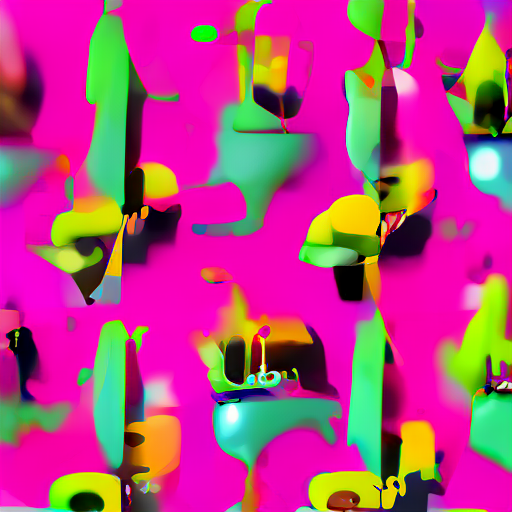

In [ ]:
import torch
from diffusers import AmusedPipeline

pipe = AmusedPipeline.from_pretrained(
    "amused/amused-512", variant="fp16", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

prompt = "Generate a captivating and vibrant image should have done your homework you should know what to expect for example if you take LSD and begin intense bouts of vomiting this is not a proper reaction to LSD something is wrong either with the LSD or with your relationship to it you should know what a tip because a typical trip will put you through "
negative_prompt = "low quality, ugly"

image = pipe(prompt, negative_prompt=negative_prompt, generator=torch.manual_seed(0)).images[0]
image


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

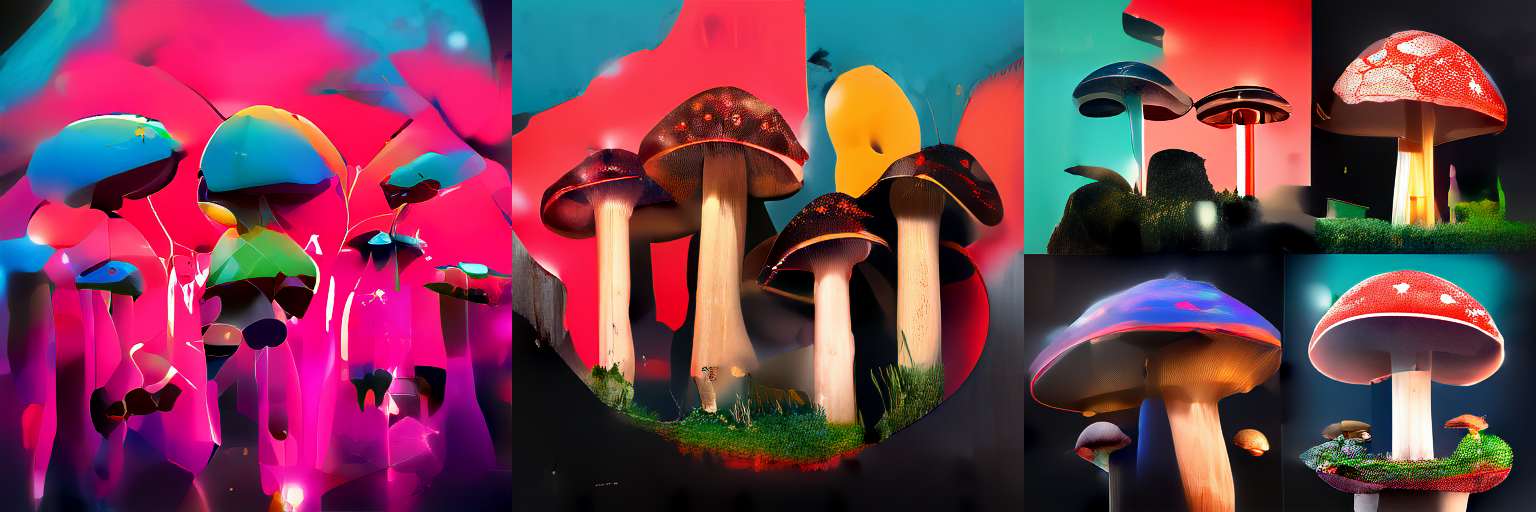

In [ ]:
from diffusers.utils import make_image_grid

images = []
for step in [5, 10, 15]:
    image = pipe(prompt, negative_prompt=negative_prompt, num_inference_steps=step, generator=torch.manual_seed(0)).images[0]
    images.append(image)

grid = make_image_grid(images, rows=1, cols=3)
grid


In [ ]:
import torch
from transformers import IdeficsForVisionText2Text, AutoProcessor

device = "cuda" if torch.cuda.is_available() else "cpu"

checkpoint = "HuggingFaceM4/idefics-9b"
model = IdeficsForVisionText2Text.from_pretrained(checkpoint, torch_dtype=torch.bfloat16).to(device)
processor = AutoProcessor.from_pretrained(checkpoint)

# We feed to the model an arbitrary sequence of text strings and images. Images can be either URLs or PIL Images.
prompts = [
    [
        "https://upload.wikimedia.org/wikipedia/commons/8/86/Id%C3%A9fix.JPG",
        "In this picture from Asterix and Obelix, we can see"
    ],
]

# --batched mode
inputs = processor(prompts, return_tensors="pt").to(device)
# --single sample mode
# inputs = processor(prompts[0], return_tensors="pt").to(device)

# Generation args
bad_words_ids = processor.tokenizer(["<image>", "<fake_token_around_image>"], add_special_tokens=False).input_ids

generated_ids = model.generate(**inputs, bad_words_ids=bad_words_ids, max_length=100)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)
for i, t in enumerate(generated_text):
    print(f"{i}:\n{t}\n")


config.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/99.2k [00:00<?, ?B/s]

model-00001-of-00019.safetensors:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

model-00002-of-00019.safetensors:   0%|          | 0.00/1.82G [00:00<?, ?B/s]

model-00003-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00005-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00006-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00007-of-00019.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00008-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00009-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00010-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00011-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00012-of-00019.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00013-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00014-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00015-of-00019.safetensors:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

model-00016-of-00019.safetensors:   0%|          | 0.00/1.97G [00:00<?, ?B/s]

model-00017-of-00019.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00018-of-00019.safetensors:   0%|          | 0.00/1.97G [00:00<?, ?B/s]

model-00019-of-00019.safetensors:   0%|          | 0.00/705M [00:00<?, ?B/s]